In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


In [3]:
pd.set_option('display.max_rows', None)
df = pd.read_excel('/content/dataset20.xlsx', header=None)
df = pd.DataFrame([row[0].split() for row in df.values[1:]],
                 columns=['Index', 'lcavol', 'lweight', 'age', 'lbph', 'svi', 'lcp', 'gleason', 'pgg45', 'lpsa'])
df = df.astype({'Index': int,
                'lcavol': float,
                'lweight': float,
                'age': int,
                'lbph': float,
                'svi': int,
                'lcp': float,
                'gleason': int,
                'pgg45': int,
                'lpsa': float})

print(df)

    Index    lcavol   lweight  age      lbph  svi       lcp  gleason  pgg45  \
0       1 -0.579818  2.769459   50 -1.386294    0 -1.386294        6      0   
1       2 -0.994252  3.319626   58 -1.386294    0 -1.386294        6      0   
2       3 -0.510826  2.691243   74 -1.386294    0 -1.386294        7     20   
3       4 -1.203973  3.282789   58 -1.386294    0 -1.386294        6      0   
4       5  0.751416  3.432373   62 -1.386294    0 -1.386294        6      0   
5       6 -1.049822  3.228826   50 -1.386294    0 -1.386294        6      0   
6       7  0.737164  3.473518   64  0.615186    0 -1.386294        6      0   
7       8  0.693147  3.539509   58  1.536867    0 -1.386294        6      0   
8       9 -0.776529  3.539509   47 -1.386294    0 -1.386294        6      0   
9      10  0.223144  3.244544   63 -1.386294    0 -1.386294        6      0   
10     11  0.254642  3.604138   65 -1.386294    0 -1.386294        6      0   
11     12 -1.347074  3.598681   63  1.266948    0 -1

In [4]:
df.head()

,Index,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
0,1,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783
1,2,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519
2,3,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519
3,4,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519
4,5,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564


In [5]:
df.tail()

,Index,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
92,93,2.830268,3.876396,68,-1.386294,1,1.321756,7,60,4.385147
93,94,3.821004,3.896909,44,-1.386294,1,2.169054,7,40,4.684443
94,95,2.907447,3.396185,52,-1.386294,1,2.463853,7,10,5.143124
95,96,2.882564,3.773910,68,1.558145,1,1.558145,7,80,5.477509
96,97,3.471966,3.974998,68,0.438255,1,2.904165,7,20,5.582932


In [6]:
df.shape

(97, 10)

In [7]:
 df.duplicated().sum()

0

In [8]:
 df.isnull().sum()

,0
Index,0
lcavol,0
lweight,0
age,0
lbph,0
svi,0
lcp,0
gleason,0
pgg45,0
lpsa,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Index    97 non-null     int64  
 1   lcavol   97 non-null     float64
 2   lweight  97 non-null     float64
 3   age      97 non-null     int64  
 4   lbph     97 non-null     float64
 5   svi      97 non-null     int64  
 6   lcp      97 non-null     float64
 7   gleason  97 non-null     int64  
 8   pgg45    97 non-null     int64  
 9   lpsa     97 non-null     float64
dtypes: float64(5), int64(5)
memory usage: 7.7 KB


In [10]:
df.describe()

,Index,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
count,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000
mean,49.000000,1.350010,3.628943,63.865979,0.100356,0.216495,-0.179366,6.752577,24.381443,2.478387
std,28.145456,1.178625,0.428411,7.445117,1.450807,0.413995,1.398250,0.722134,28.204035,1.154329
min,1.000000,-1.347074,2.374906,41.000000,-1.386294,0.000000,-1.386294,6.000000,0.000000,-0.430783
25%,25.000000,0.512824,3.375880,60.000000,-1.386294,0.000000,-1.386294,6.000000,0.000000,1.731656
50%,49.000000,1.446919,3.623007,65.000000,0.300105,0.000000,-0.798508,7.000000,15.000000,2.591516
75%,73.000000,2.127041,3.876396,68.000000,1.558145,0.000000,1.178655,7.000000,40.000000,3.056357
max,97.000000,3.821004,4.780383,79.000000,2.326302,1.000000,2.904165,9.000000,100.000000,5.582932


In [11]:
df.nunique()

,0
Index,97
lcavol,93
lweight,88
age,31
lbph,42
svi,2
lcp,30
gleason,4
pgg45,19
lpsa,85


In [14]:
def classify_features(df):
    categorical_features = []
    non_categorical_features = []
    discrete_features = []
    continuous_features = []

    for column in df.columns:
        if df[column].dtype == 'object':
            if df[column].nunique() < 40:
                categorical_features.append(column)
            else:
                non_categorical_features.append(column)
        elif df[column].dtype in ['int64', 'float64']:
            if df[column].nunique() < 10:
                discrete_features.append(column)
            else:
                continuous_features.append(column)

    return categorical_features, non_categorical_features, discrete_features, continuous_features

categorical, non_categorical, discrete, continuous = classify_features(df)



In [13]:

print("Categorical Features:", categorical)
print("Non-Categorical Features:", non_categorical)
print("Discrete Features:", discrete)
print("Continuous Features:", continuous)

Categorical Features: []
Non-Categorical Features: []
Discrete Features: ['svi', 'gleason']
Continuous Features: ['Index', 'lcavol', 'lweight', 'age', 'lbph', 'lcp', 'pgg45', 'lpsa']


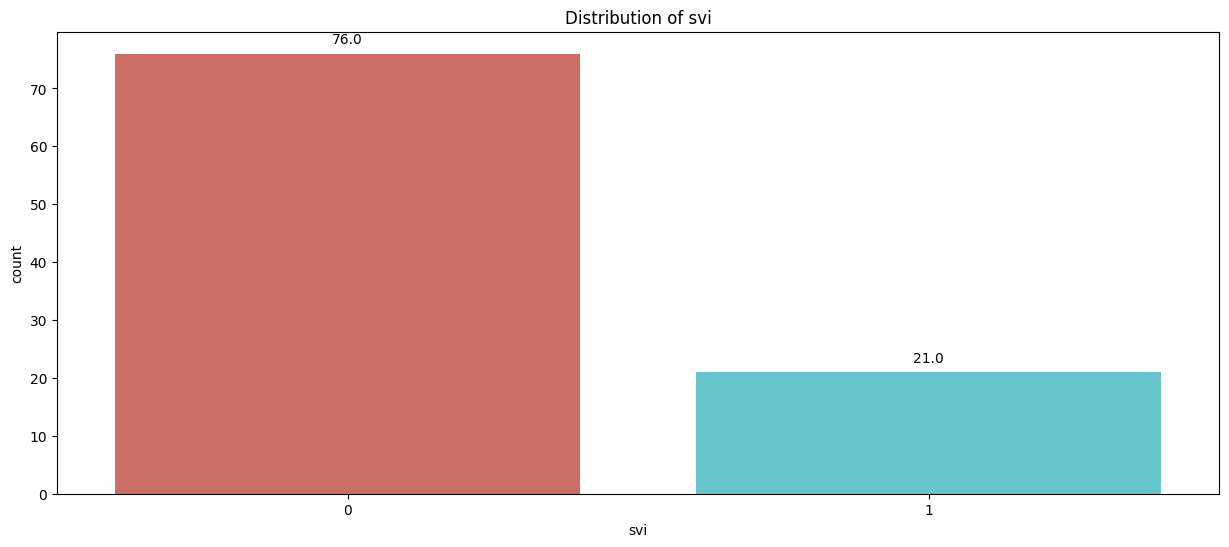

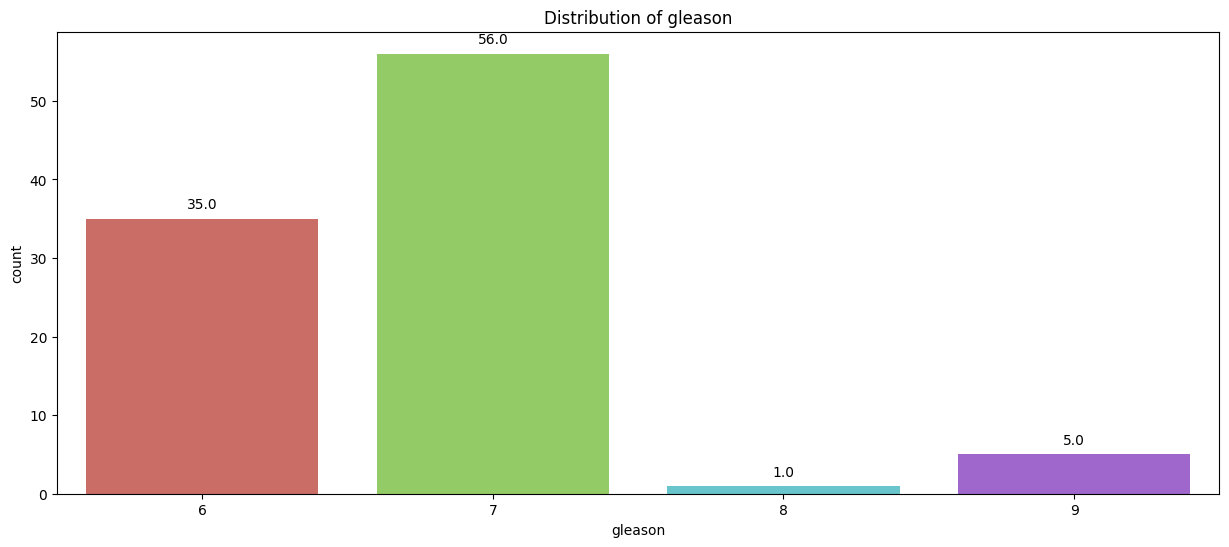

In [15]:
for i in discrete:
    plt.figure(figsize=(15, 6))
    ax = sns.countplot(x=i, data=df, palette='hls')
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(
            f'{height}',
            xy=(p.get_x() + p.get_width() / 2, height),
            xytext=(0, 10),  # Offset annotation 10 points above the bar
            textcoords='offset points',
            ha='center',  # Horizontal alignment
            va='center'   # Vertical alignment
        )
    plt.title(f'Distribution of {i}')
    plt.show()

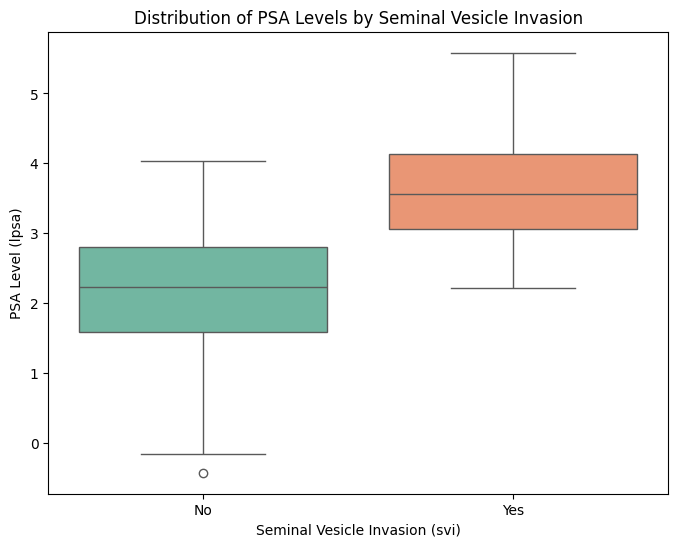

In [31]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='svi', y='lpsa', palette='Set2')
plt.title('Distribution of PSA Levels by Seminal Vesicle Invasion')
plt.xlabel('Seminal Vesicle Invasion (svi)')
plt.ylabel('PSA Level (lpsa)')
_ = plt.xticks([0, 1], ['No', 'Yes'])

In [16]:
import plotly.express as px

for i in discrete:
    counts = df[i].value_counts().reset_index()
    counts.columns = [i, 'count']  # Rename columns for clarity

    fig = px.pie(
        counts,
        values='count',
        names=i,
        title=f'Distribution of {i}'
    )

    fig.show()


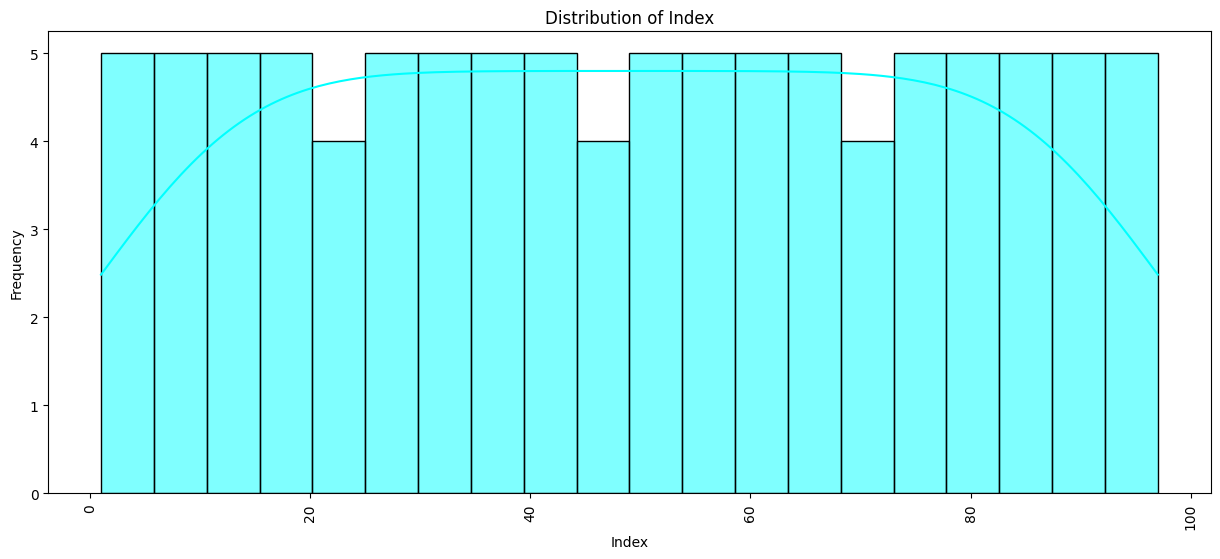

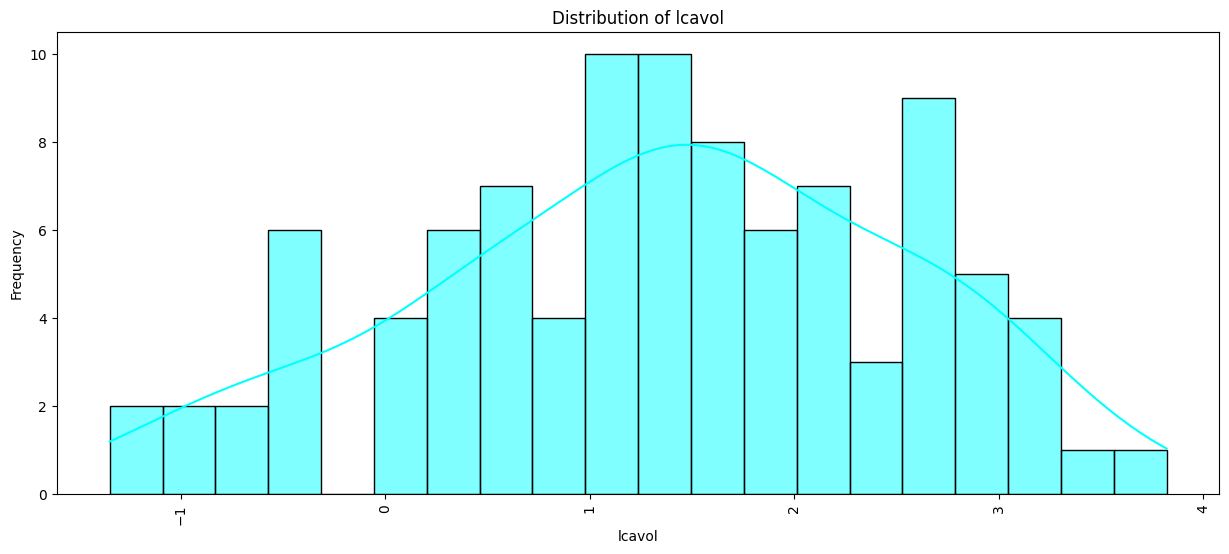

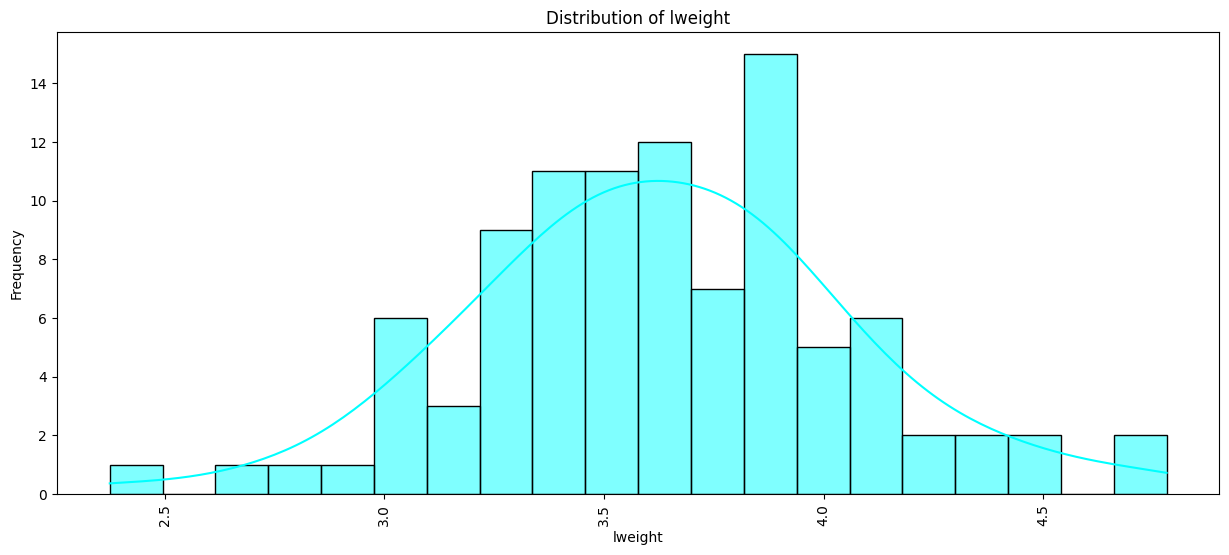

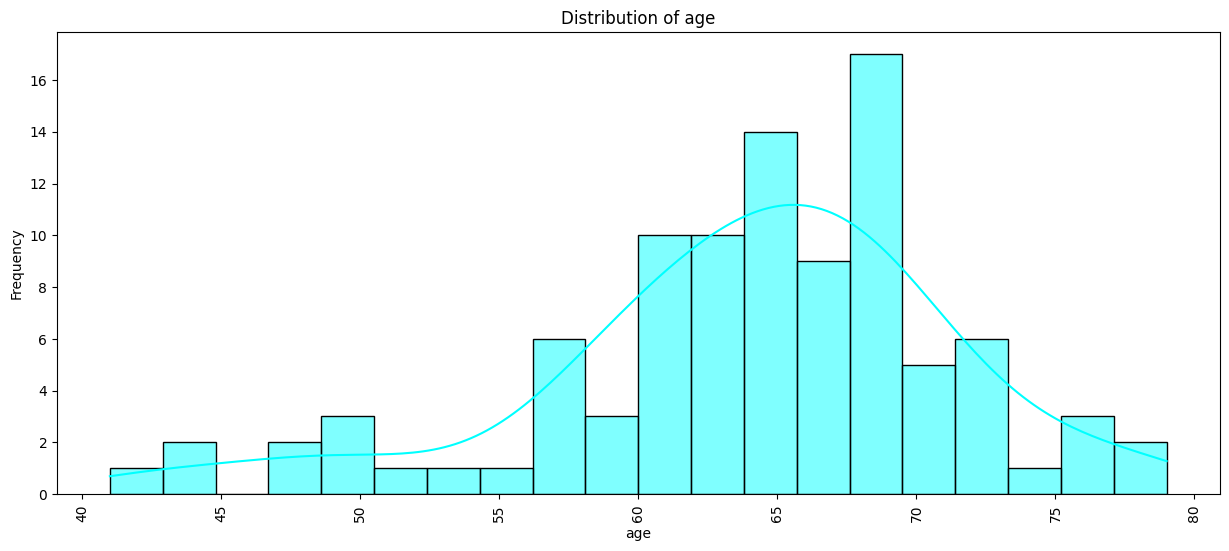

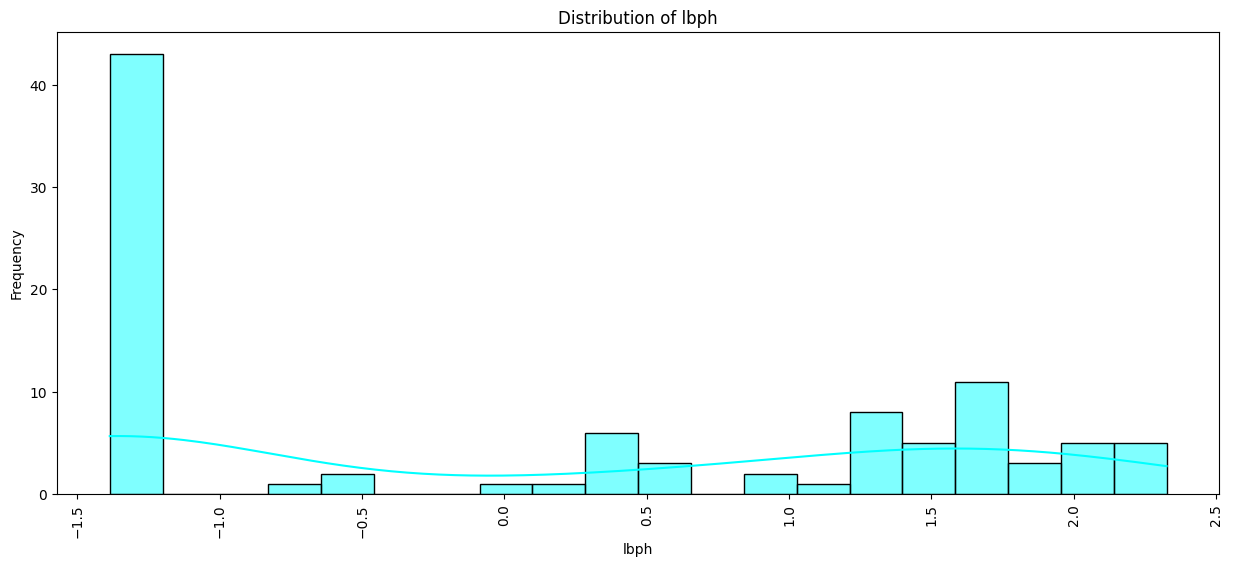

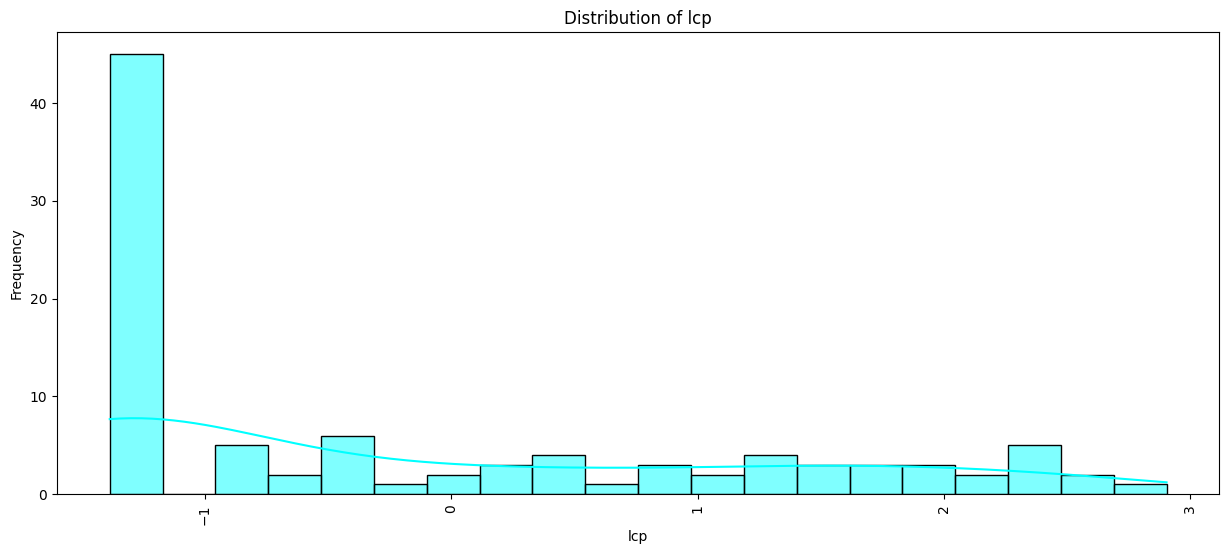

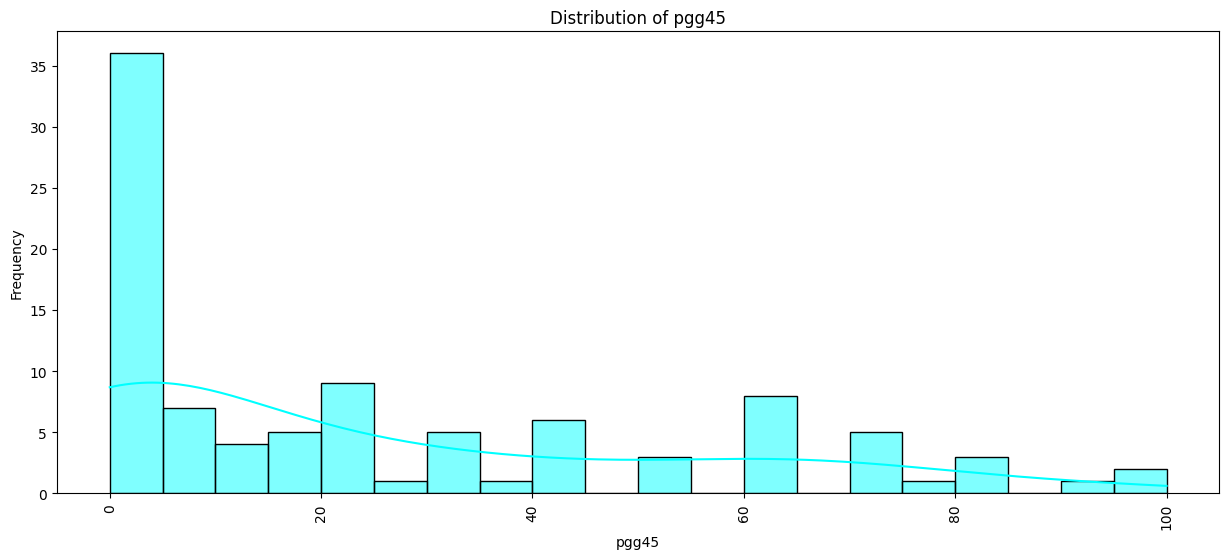

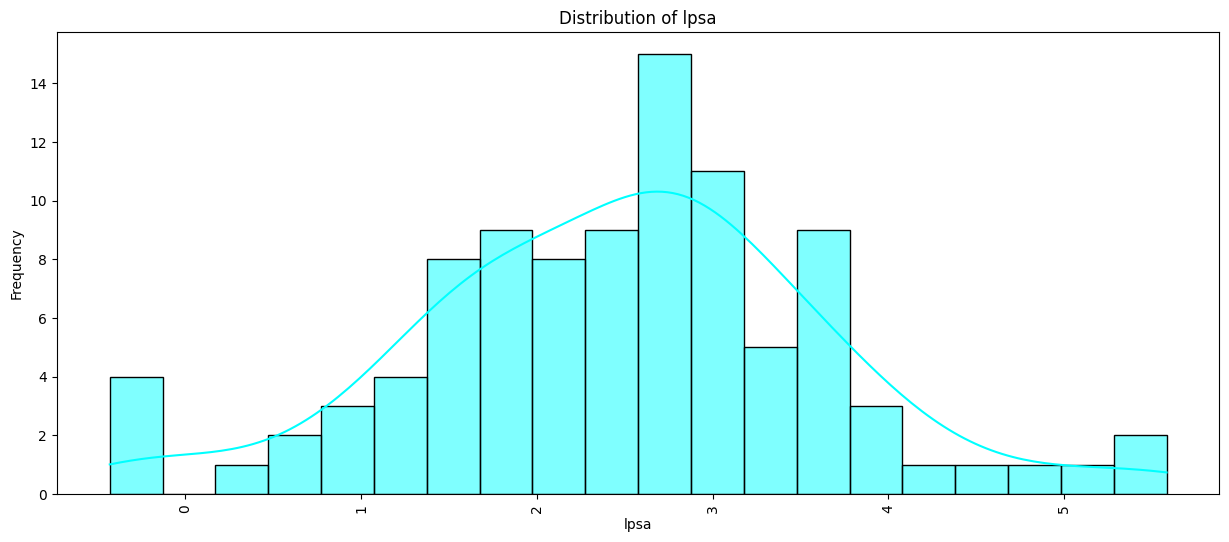

In [17]:
for i in continuous:
    plt.figure(figsize=(15, 6))
    sns.histplot(data=df, x=i, bins=20, kde=True, color='cyan')  # Use sns.histplot for histogram with KDE
    plt.xticks(rotation=90)
    plt.title(f'Distribution of {i}')
    plt.xlabel(i)
    plt.ylabel("Frequency")
    plt.show()

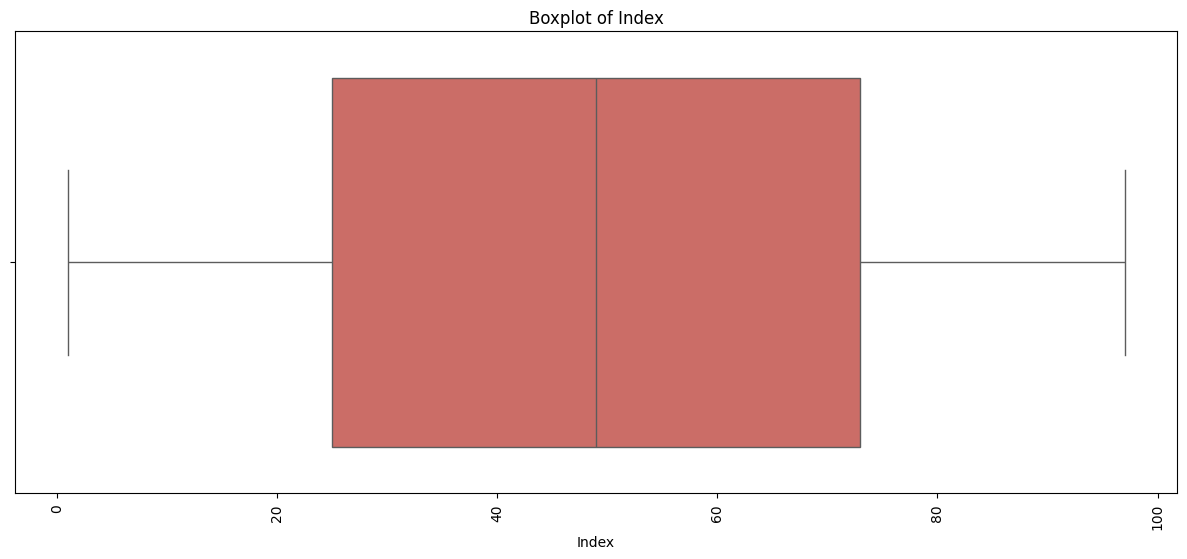

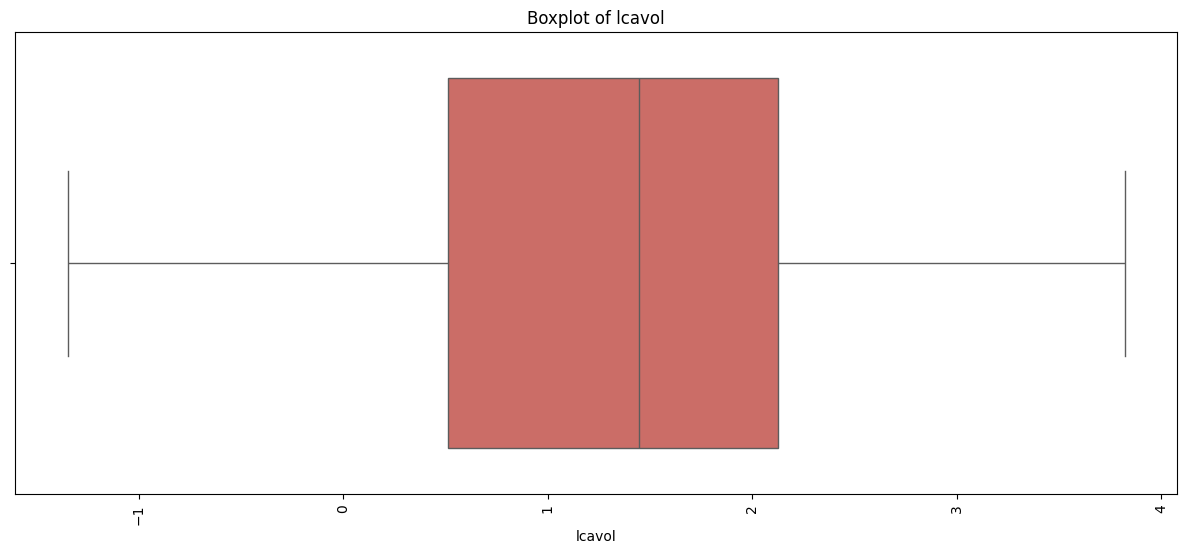

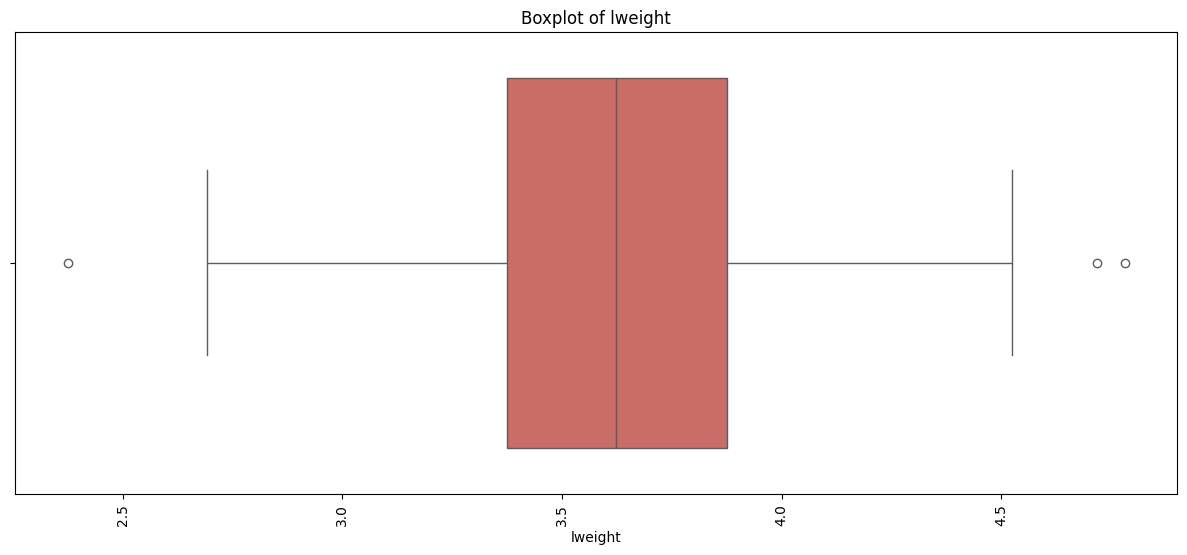

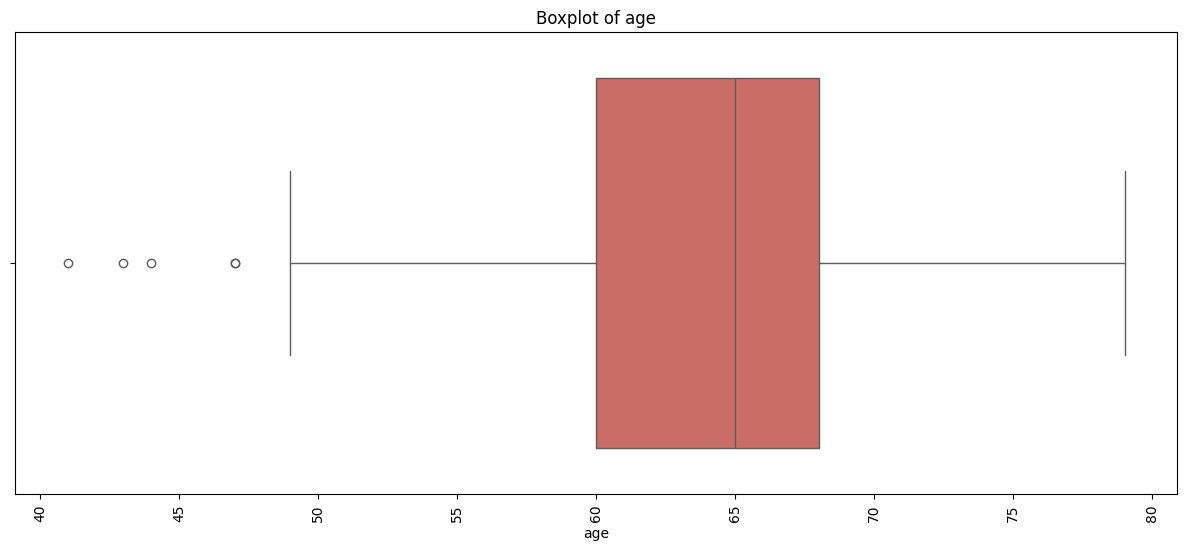

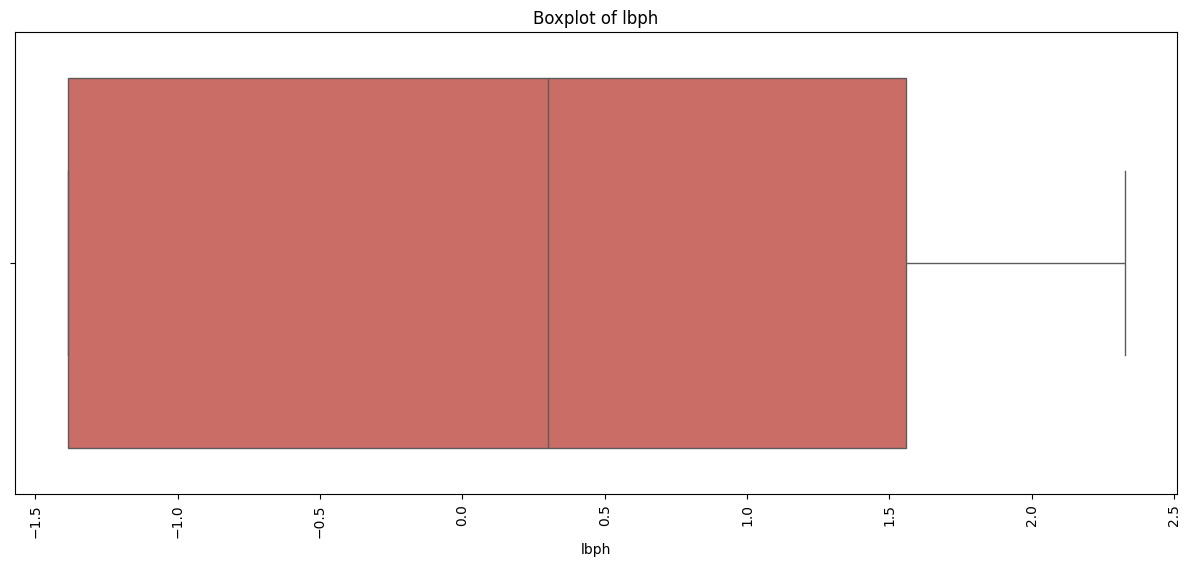

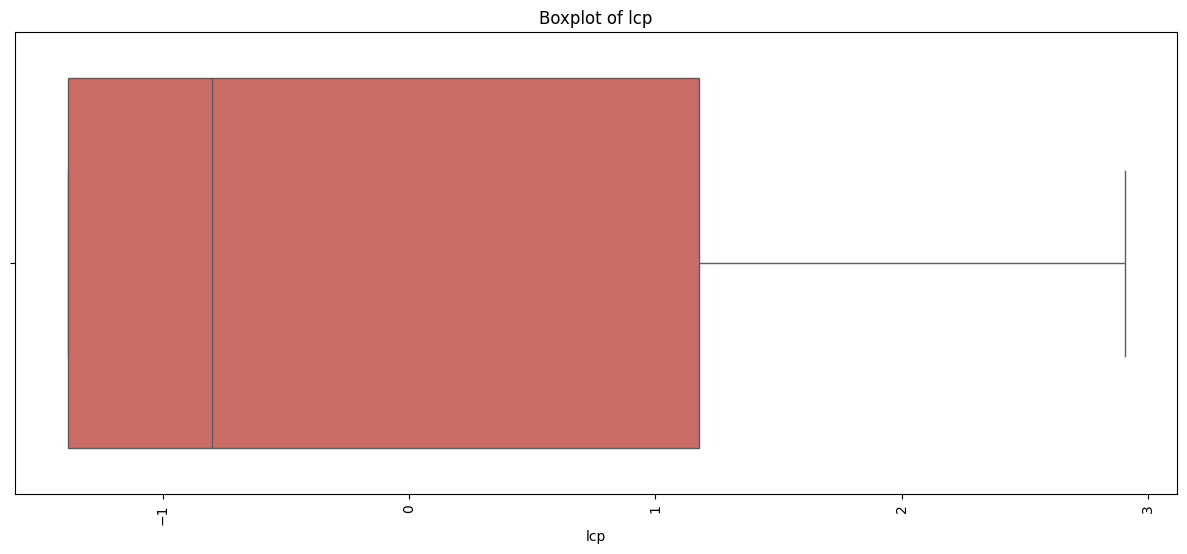

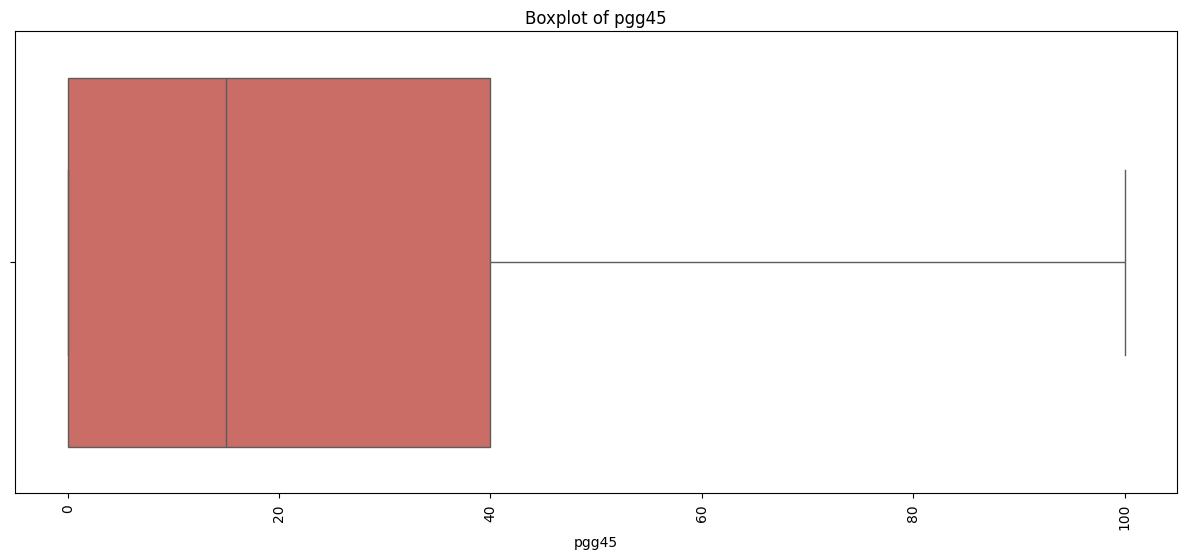

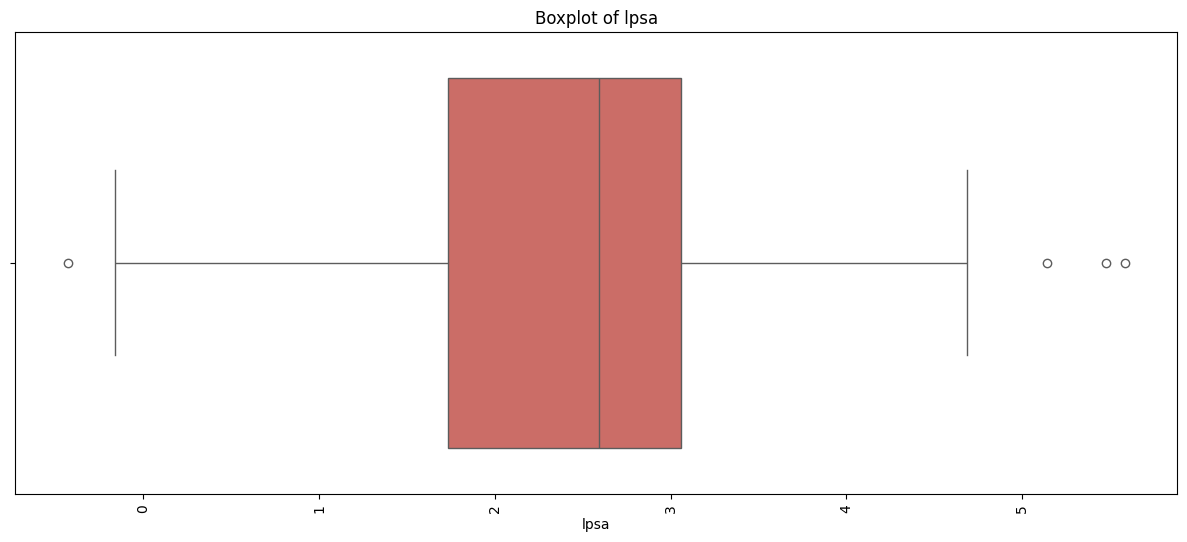

In [18]:
for i in continuous:
    plt.figure(figsize=(15, 6))
    sns.boxplot(x=i, data=df, palette='hls')
    plt.xticks(rotation=90)
    plt.title(f'Boxplot of {i}')
    plt.xlabel(i)
    plt.show()

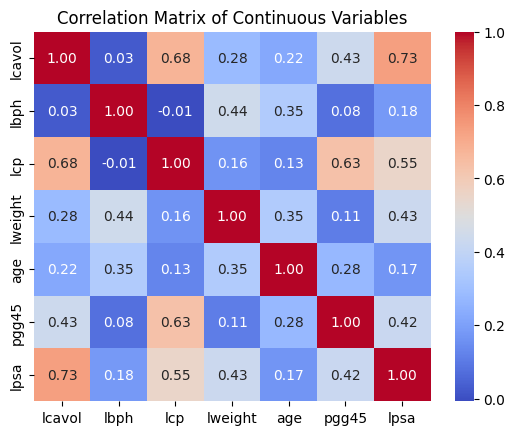

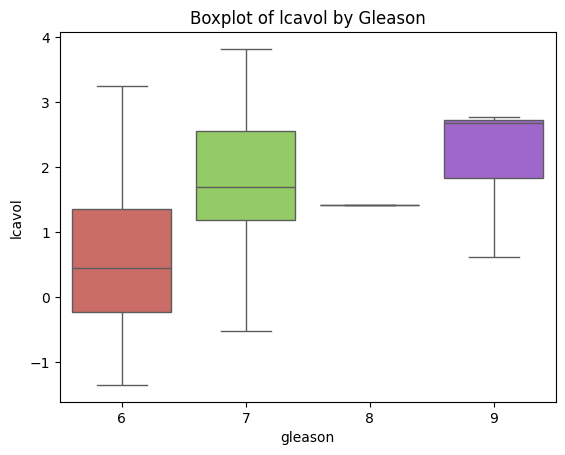

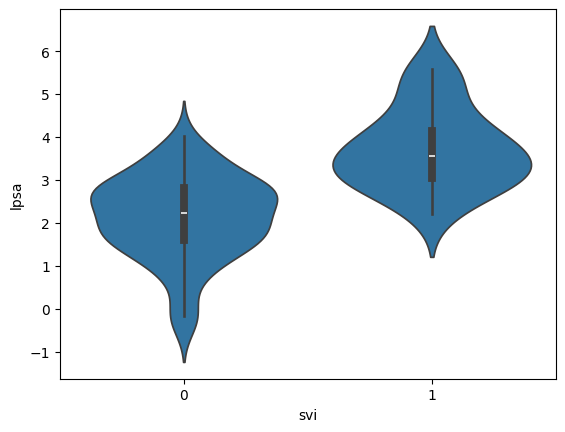

In [19]:
# Correlation Matrix and Heatmap
correlation_matrix = df[['lcavol', 'lbph', 'lcp', 'lweight', 'age', 'pgg45', 'lpsa']].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Continuous Variables')
plt.show()

# Boxplot of 'lcavol' by 'gleason'
sns.boxplot(x='gleason', y='lcavol', data=df, palette='hls')
plt.title('Boxplot of lcavol by Gleason')
plt.show()

# Violin plot of 'lpsa' by 'svi'
sns.violinplot(x='svi', y='lpsa', data=df)
plt.show()

In [20]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df['svi'], df['gleason'])

# Perform Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-Square Test result:\nChi2: {chi2}\nP-value: {p}")

Chi-Square Test result:
Chi2: 15.917698263515934
P-value: 0.0011789029168086315


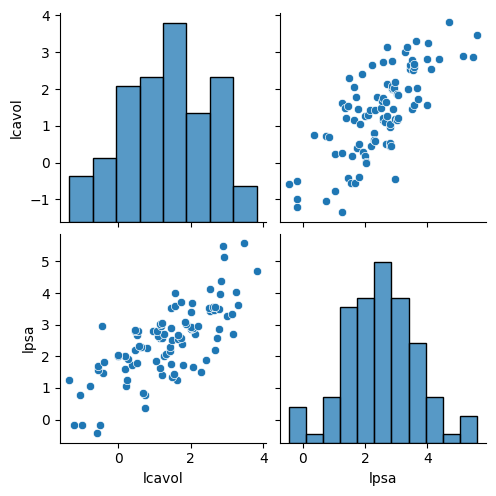

In [21]:
sns.pairplot(df[['lcavol', 'lpsa']])
plt.show()

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

X = df[['svi', 'age', 'lcavol']]
y = df[['lweight', 'lbph', 'lcp', 'pgg45', 'gleason', 'lpsa']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R2:", r2_score(y_test, y_pred))


MSE: 187.12034845880035
R2: 0.23432333352336268


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score

# Cross-validation scores for Linear Regression
cv_scores = cross_val_score(model, X, y, cv=5)
print("Cross-validation scores:", cv_scores)

# Classifying based on 'lpsa'
y_class = (df['lpsa'] > df['lpsa'].median()).astype(int)

# Train-test split for classification
X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.2, random_state=42)

# Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Prediction and accuracy
y_pred_class = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_class))


Cross-validation scores: [-1.1811319  -1.94813594 -2.60815181 -2.90779787 -0.56632782]
Accuracy: 0.7


In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd

X_vif = add_constant(df[['lcavol', 'lweight', 'age', 'lbph', 'lcp', 'pgg45', 'gleason', 'svi']])
vif = pd.DataFrame()
vif['Features'] = X_vif.columns
vif['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
print(vif)


  Features         VIF
0    const  345.714819
1   lcavol    2.102650
2  lweight    1.453326
3      age    1.336099
4     lbph    1.385040
5      lcp    3.097954
6    pgg45    2.974075
7  gleason    2.468891
8      svi    1.955928


In [25]:
import tensorflow as tf
from tensorflow.keras import layers, models


In [26]:
class AttentionLayer(layers.Layer):
    def __init__(self, units):
        super(AttentionLayer, self).__init__()
        self.units = units

    def build(self, input_shape):
        self.query_dense = layers.Dense(self.units)
        self.key_dense = layers.Dense(self.units)
        self.value_dense = layers.Dense(self.units)

    def call(self, inputs):
        query = self.query_dense(inputs)
        key = self.key_dense(inputs)
        value = self.value_dense(inputs)

        attention_scores = tf.matmul(query, key, transpose_b=True)
        attention_scores = attention_scores / tf.sqrt(float(self.units))

        attention_weights = tf.nn.softmax(attention_scores, axis=-1)

        output = tf.matmul(attention_weights, value)

        return output


In [27]:
def build_model(input_shape):
    inputs = layers.Input(shape=input_shape)
    x = layers.Dense(64, activation='relu')(inputs)
    x = AttentionLayer(64)(x)
    x = layers.Dense(32, activation='relu')(x)
    x = layers.Dense(1)(x)
    model = models.Model(inputs, x)
    return model


In [28]:
model = build_model((X_train.shape[1],))
model.compile(optimizer='adam', loss='mean_squared_error')

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 118ms/step - loss: 13.8938 - val_loss: 8.7415
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 6.8004 - val_loss: 0.6387
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.3565 - val_loss: 0.7191
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 1.1506 - val_loss: 1.1640
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1.3029 - val_loss: 0.3202
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.4128 - val_loss: 0.4816
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 0.5691 - val_loss: 0.5800
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.5061 - val_loss: 0.2474
Epoch 9/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.2577 - val_loss: 0.3369
Epoch 10/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.4228 - val_loss: 0.3272


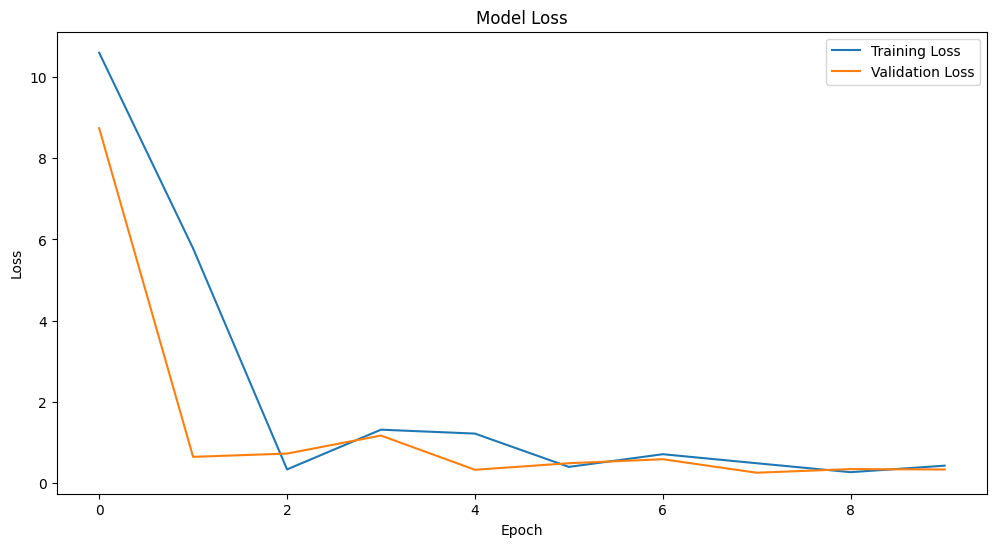

In [29]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
